In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ad.csv')

In [3]:
df.head()

,ad_id,action
0,B,1
1,B,1
2,A,0
3,B,0
4,A,1


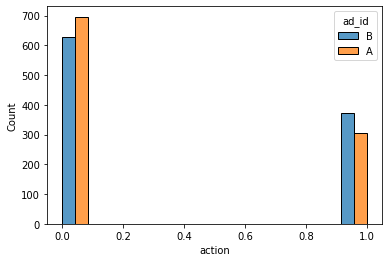

In [4]:
sns.histplot(data=df, x="action", hue="ad_id", multiple="dodge")

Промежуточные выводы:

Распределение данных дискретное, которое принимает на вход только два значения: 0 и 1

In [5]:
summary_df = df.pivot_table(values='action', index = 'ad_id', aggfunc=np.sum)

In [6]:
summary_df

,action
ad_id,
A,304
B,372


In [7]:
def length(x):
    return len(x)

lambda_def = lambda x: len(x)

In [8]:
ll = [1,2,3]
print('Длина массива через def = ', length(ll))
print('Длина массива через lambda = ', lambda_def(ll))

Длина массива через def =  3
Длина массива через lambda =  3


In [9]:
summary_df['total_count'] = df.pivot_table(values='action', index='ad_id', aggfunc=lambda x: len(x))

summary_df['conversion_rate'] = df.pivot_table(values='action', index='ad_id')

In [10]:
summary_df['std_p'] = df.pivot_table(values='action', index='ad_id', aggfunc = lambda x: np.std(x, ddof=0))
summary_df['se_p'] = df.pivot_table(values='action', index='ad_id', aggfunc = lambda x: stats.sem(x, ddof=0))

In [11]:
summary_df

,action,total_count,conversion_rate,std_p,se_p
ad_id,,,,,
A,304,1000,0.304,0.459983,0.014546
B,372,1000,0.372,0.483338,0.015285


Промежуточные выводы:

Дизайн рекламы B лучше, чем A (conversion_rate B > conversion_rate A)
Отрисуем данную пропорциональность на графике ниже

Text(0, 0.5, 'Коэф-т конверсии')

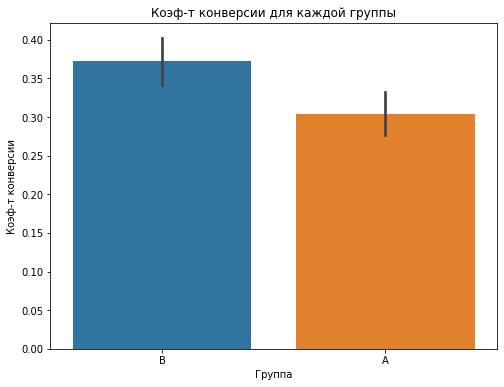

In [12]:
plt.figure(figsize=(8,6))

sns.barplot(x=df['ad_id'], y=df['action'])

plt.title('Коэф-т конверсии для каждой группы')
plt.xlabel('Группа')
plt.ylabel('Коэф-т конверсии')

In [14]:
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

In [15]:
control_results = df[df['ad_id'] == 'A']['action']
test_results = df[df['ad_id'] == 'B']['action']

In [16]:
nobs = [control_results.count(), test_results.count()]


In [17]:
successes = [control_results.sum(), test_results.sum()]

In [18]:
z_stat, pval = proportions_ztest(successes, nobs)

print('z statistic:', z_stat)
print('p-value:', pval)

z statistic: -3.2144492244084213
p-value: 0.0013069502732125403


In [19]:
alpha = 0.05

In [20]:
print(pval < alpha)

True


Промежуточные выводы:

1. Тк p-value < 0.05, то отклоняем нулевую гипотезу, что означает - новый дизайн рекламы работал значительно иначе, чем старый
2. Если посмотрим на доверительные интервалы, то для нового дизайна В конверсия включает/не включает таргет и базовое значение коэф-та конверсии

In [21]:
(lower_con, lower_test), (upper_con, upper_test) = proportion_confint(successes, nobs=nobs, alpha=alpha)

print('Доверительный интервал для контрольной группы A:', lower_con, ' - ', upper_con)
print('Доверительный интервал для тестовой группы B:', lower_test, ' - ', upper_test)

Доверительный интервал для контрольной группы A: 0.2754905064387712  -  0.3325094935612288
Доверительный интервал для тестовой группы B: 0.3420429266473629  -  0.4019570733526371


Промежуточные выводы:

В результате нового дизайна B, можем ждать улучшений до 40% (подъем максимум на 10%) - новый дизайн даст улучшения